# Introduction to Comvolutional Neural Networks and Computer Vision with TensorFlow

**Conputer vision** is practice of writing algorithms which can discover patterns in visual data. Such as the Camera of a self-driving car recognizing the car in front.

## Get the data

The image we're working with are from the [Food101 dataset](https://www.kaggle.com/dansbecker/food-101) (101 different classes of food): https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

However we've modified it to only use two classes (pizza & steak) using the image data modification notebook: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

> **Note :** We start with a smaller dataset so we can experiment quickly and figureout what works (or better yet what doesn't work) before scalling up.


In [1]:
import zipfile

# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# # Unzip the downloaded file
# zip_ref = zipfile.ZipFile('pizza_steak.zip')
# zip_ref.extractall()
# zip_ref.close()

--2021-06-02 19:47:00--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.67.240, 172.217.174.80, 142.250.77.48, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.67.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: 'pizza_steak.zip.1'

     0K .......... .......... .......... .......... ..........  0%  635K 2m48s
    50K .......... .......... .......... .......... ..........  0% 1.24M 2m6s
   100K .......... .......... .......... .......... ..........  0% 1.66M 1m45s
   150K .......... .......... .......... .......... ..........  0% 2.16M 91s
   200K .......... .......... .......... .......... ..........  0% 3.37M 79s
   250K .......... .......... .......... .......... ..........  0% 3.20M 71s
   300K .......... .......... .......... .......... ..........  0% 2.67M 67s
   350K .......... .........

## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for computer vision project... this usually means visualizing many samples of your data.

In [1]:
!dir pizza_steak

 Volume in drive D is Adobe
 Volume Serial Number is 72F5-1F24

 Directory of D:\Python\TensorFlow_full_course\pizza_steak

02-06-2021  05:22 PM    <DIR>          .
02-06-2021  05:22 PM    <DIR>          ..
02-06-2021  07:47 PM             6,148 .DS_Store
02-06-2021  05:22 PM    <DIR>          test
02-06-2021  05:22 PM    <DIR>          train
               1 File(s)          6,148 bytes
               4 Dir(s)  40,864,890,880 bytes free


In [2]:
!dir pizza_steak\train\

 Volume in drive D is Adobe
 Volume Serial Number is 72F5-1F24

 Directory of D:\Python\TensorFlow_full_course\pizza_steak\train

02-06-2021  05:22 PM    <DIR>          .
02-06-2021  05:22 PM    <DIR>          ..
02-06-2021  07:47 PM             8,196 .DS_Store
02-06-2021  05:22 PM    <DIR>          pizza
02-06-2021  05:22 PM    <DIR>          steak
               1 File(s)          8,196 bytes
               4 Dir(s)  40,864,890,880 bytes free


In [3]:
!dir pizza_steak\train\steak

 Volume in drive D is Adobe
 Volume Serial Number is 72F5-1F24

 Directory of D:\Python\TensorFlow_full_course\pizza_steak\train\steak

02-06-2021  05:22 PM    <DIR>          .
02-06-2021  05:22 PM    <DIR>          ..
02-06-2021  07:47 PM            36,185 1000205.jpg
02-06-2021  07:47 PM            34,497 100135.jpg
02-06-2021  07:47 PM           116,802 101312.jpg
02-06-2021  07:47 PM            56,754 1021458.jpg
02-06-2021  07:47 PM            34,143 1032846.jpg
02-06-2021  07:47 PM            24,688 10380.jpg
02-06-2021  07:47 PM            37,134 1049459.jpg
02-06-2021  07:47 PM            49,841 1053665.jpg
02-06-2021  07:47 PM            59,983 1068516.jpg
02-06-2021  07:47 PM            28,996 1068975.jpg
02-06-2021  07:47 PM            29,525 1081258.jpg
02-06-2021  07:47 PM            49,577 1090122.jpg
02-06-2021  07:47 PM            59,976 1093966.jpg
02-06-2021  07:47 PM            60,253 1098844.jpg
02-06-2021  07:47 PM            69,843 1100074.jpg
02-06-2021  07:47 PM

02-06-2021  07:47 PM            35,534 1945132.jpg
02-06-2021  07:47 PM           110,964 1961025.jpg
02-06-2021  07:47 PM            62,782 1966300.jpg
02-06-2021  07:47 PM            66,107 1966967.jpg
02-06-2021  07:47 PM            58,284 1969596.jpg
02-06-2021  07:47 PM            68,232 1971757.jpg
02-06-2021  07:47 PM            52,121 1976160.jpg
02-06-2021  07:47 PM            54,650 1984271.jpg
02-06-2021  07:47 PM            42,135 1987213.jpg
02-06-2021  07:47 PM            33,399 1987639.jpg
02-06-2021  07:47 PM            47,714 1995118.jpg
02-06-2021  07:47 PM            35,115 1995252.jpg
02-06-2021  07:47 PM            34,782 199754.jpg
02-06-2021  07:47 PM            42,879 2002400.jpg
02-06-2021  07:47 PM            48,729 2011264.jpg
02-06-2021  07:47 PM            45,671 2012996.jpg
02-06-2021  07:47 PM            66,641 2013535.jpg
02-06-2021  07:47 PM            48,116 2017387.jpg
02-06-2021  07:47 PM            69,222 2018173.jpg
02-06-2021  07:47 PM            

In [1]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.')

There are 2 directories and 1 images in pizza_steak.
There are 2 directories and 1 images in pizza_steak\test.
There are 0 directories and 250 images in pizza_steak\test\pizza.
There are 0 directories and 250 images in pizza_steak\test\steak.
There are 2 directories and 1 images in pizza_steak\train.
There are 0 directories and 750 images in pizza_steak\train\pizza.
There are 0 directories and 750 images in pizza_steak\train\steak.


In [2]:
# The extra file in our pizza_steak directory is ".Ds_Store"
!dir -la pizza_steak

 Volume in drive D is Adobe
 Volume Serial Number is 72F5-1F24

 Directory of d:\Python\TensorFlow_full_course


 Directory of d:\Python\TensorFlow_full_course\pizza_steak

02-06-2021  05:22 PM    <DIR>          .
02-06-2021  05:22 PM    <DIR>          ..
02-06-2021  07:47 PM             6,148 .DS_Store
02-06-2021  05:22 PM    <DIR>          test
02-06-2021  05:22 PM    <DIR>          train
               1 File(s)          6,148 bytes
               4 Dir(s)  40,864,088,064 bytes free


File Not Found


In [3]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir('pizza_steak/train/steak'))

num_steak_images_train

750

To visualize our images, first let's get the class name programmatically.

In [4]:
# fet the classnames programmatically 
import pathlib
import numpy as np
data_dir = pathlib.Path('pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # Create a list of class_names from the subdirectly 
class_names = class_names[1:] # remove .DS_Store 
print(class_names)

['pizza' 'steak']


In [5]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random 
plt.style.use('dark_background')

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir + target_class

  # Get a random image path 
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f'Image Shape: {img.shape}') # Show the shape of the image

  return img

['771878.jpg']
Image Shape: (512, 384, 3)


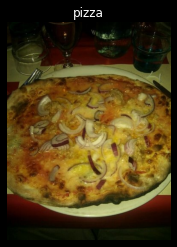

In [6]:
# View a ranodm image from the training datasets
img = view_random_image(target_dir='pizza_steak/train/', 
                        target_class='pizza')

In [7]:
# Import TensorFlow
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 384, 3), dtype=uint8, numpy=
array([[[ 4,  5,  0],
        [ 5,  6,  1],
        [ 6,  7,  2],
        ...,
        [ 6,  9,  2],
        [ 4,  7,  0],
        [ 2,  5,  0]],

       [[ 4,  5,  0],
        [ 5,  6,  1],
        [ 6,  7,  2],
        ...,
        [ 4,  7,  0],
        [ 4,  7,  0],
        [ 3,  6,  0]],

       [[ 3,  4,  0],
        [ 4,  5,  0],
        [ 5,  6,  1],
        ...,
        [ 2,  4,  0],
        [ 3,  5,  0],
        [ 5,  7,  2]],

       ...,

       [[ 2,  7,  1],
        [ 3,  8,  2],
        [ 3,  8,  2],
        ...,
        [ 5, 13,  0],
        [ 5, 13,  0],
        [ 5, 13,  0]],

       [[ 2,  7,  1],
        [ 3,  8,  2],
        [ 3,  8,  2],
        ...,
        [ 5, 13,  0],
        [ 6, 14,  1],
        [ 6, 14,  1]],

       [[ 2,  7,  1],
        [ 3,  8,  2],
        [ 3,  8,  2],
        ...,
        [ 5, 13,  0],
        [ 6, 14,  1],
        [ 6, 14,  1]]], dtype=uint8)>

In [8]:
tf.__version__

'2.5.0'

In [9]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [10]:
# View image shape
img.shape # returns width, height, color channels

(512, 384, 3)

> **Note :** As we're discussed before, many ,achine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of most common preprocessing steps for working with images is to scale (also referred to as **normalize**) their pixel values by dividing the image array by 255 (since 255 is the maximum pixel value).

In [11]:
# Get all the pixel values between 0 & 1
img/255.0 

array([[[0.01568627, 0.01960784, 0.        ],
        [0.01960784, 0.02352941, 0.00392157],
        [0.02352941, 0.02745098, 0.00784314],
        ...,
        [0.02352941, 0.03529412, 0.00784314],
        [0.01568627, 0.02745098, 0.        ],
        [0.00784314, 0.01960784, 0.        ]],

       [[0.01568627, 0.01960784, 0.        ],
        [0.01960784, 0.02352941, 0.00392157],
        [0.02352941, 0.02745098, 0.00784314],
        ...,
        [0.01568627, 0.02745098, 0.        ],
        [0.01568627, 0.02745098, 0.        ],
        [0.01176471, 0.02352941, 0.        ]],

       [[0.01176471, 0.01568627, 0.        ],
        [0.01568627, 0.01960784, 0.        ],
        [0.01960784, 0.02352941, 0.00392157],
        ...,
        [0.00784314, 0.01568627, 0.        ],
        [0.01176471, 0.01960784, 0.        ],
        [0.01960784, 0.02745098, 0.00784314]],

       ...,

       [[0.00784314, 0.02745098, 0.00392157],
        [0.01176471, 0.03137255, 0.00784314],
        [0.01176471, 0

## An End-to-End example

Let's buid a convolutional neural network to find patterns in our images, more specifically we a need way to:
* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the random seed
tf.random.set_seed(42)

# Preprocess data (get all of pixel values between 0 & 1, also called scaling/Normalization)
train_datagen = ImageDataGenerator(rescale=1./255.)
valid_datagen = ImageDataGenerator(rescale=1./255.)

# Setup paths to our data directories
train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, 
                                               batch_size=32, 
                                               target_size=(224, 224), 
                                               class_mode='binary',
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir, 
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
                                      tf.keras.layers.Conv2D(filters=10,
                                                             kernel_size=3,
                                                             activation='relu',
                                                             input_shape=(224, 224, 3)),
                                      tf.keras.layers.Conv2D(filters=10, 
                                                             kernel_size=3, 
                                                             activation='relu'),
                                      tf.keras.layers.MaxPool2D(pool_size=2, 
                                                                padding='valid'),
                                      tf.keras.layers.Conv2D(filters=10, 
                                                             kernel_size=3, 
                                                             activation='relu'),
                                      tf.keras.layers.Conv2D(filters=10, 
                                                             kernel_size=3,
                                                             activation='relu'),
                                      tf.keras.layers.MaxPool2D(pool_size=2),
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile our CNN
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit th model
history_1 = model_1.fit(train_data, epochs=5, steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 56s 961ms/step - loss: 0.5870 - accuracy: 0.6840 - val_loss: 0.4024 - val_accuracy: 0.8000
Epoch 2/5
47/47 [==============================] - 15s 309ms/step - loss: 0.4181 - accuracy: 0.8093 - val_loss: 0.3283 - val_accuracy: 0.8500
Epoch 3/5
47/47 [==============================] - 15s 309ms/step - loss: 0.3832 - accuracy: 0.8340 - val_loss: 0.3127 - val_accuracy: 0.8660
Epoch 4/5
47/47 [==============================] - 15s 309ms/step - loss: 0.3371 - accuracy: 0.8660 - val_loss: 0.3353 - val_accuracy: 0.8560
Epoch 5/5
47/47 [==============================] - 15s 310ms/step - loss: 0.3289 - accuracy: 0.8680 - val_loss: 0.3061 - val_accuracy: 0.8700


In [17]:
# Without GPU
# Epoch 1/5
# 47/47 [==============================] - 100s 2s/step - loss: 0.5574 - accuracy: 0.7113 - val_loss: 0.4119 - val_accuracy: 0.8260
# Epoch 2/5
# 47/47 [==============================] - 98s 2s/step - loss: 0.4357 - accuracy: 0.8047 - val_loss: 0.3478 - val_accuracy: 0.8400
# Epoch 3/5
# 47/47 [==============================] - 98s 2s/step - loss: 0.4018 - accuracy: 0.8213 - val_loss: 0.3236 - val_accuracy: 0.8660
# Epoch 4/5
# 47/47 [==============================] - 97s 2s/step - loss: 0.3806 - accuracy: 0.8293 - val_loss: 0.3193 - val_accuracy: 0.8720
# Epoch 5/5
# 47/47 [==============================] - 97s 2s/step - loss: 0.3404 - accuracy: 0.8513 - val_loss: 0.2946 - val_accuracy: 0.8800

> **Note :** If the above cell is taking longer than -10 seconds per epoch, make sure you're using a GPU by going to `Runtime -> Change Runtime Type -> Hardware Accerelator -> GPU` (you may have to rerun some cells above).

In [13]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

> **Practice/exercise :** Go through the CNN explainer website for a minimum of 10-minutes and compare our neural network with their: https://poloclub.github.io/cnn-explainer 

## Using the same model as before

LEt's replicate the model we've built in a previous section to see if it works with our image data.

The model we're building is from the [TensorFlow playground](https://playground.tensorflow.org).


In [14]:
# Set the random seed 
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
                               tf.keras.layers.Dense(4, activation='relu'),
                               tf.keras.layers.Dense(4, activation='relu'),
                               tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model 
history_2 = model_2.fit(train_data, epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 6s 126ms/step - loss: 1.5906 - accuracy: 0.5107 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 6s 124ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 6s 124ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 6s 125ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 6s 129ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [15]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 602116    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameters than our CNN (model_1), model_2 performs terribly... let's try to improve it.

In [16]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
                               tf.keras.layers.Dense(100, activation='relu'),
                               tf.keras.layers.Dense(100, activation='relu'),
                               tf.keras.layers.Dense(100, activation='relu'),
                               tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_3 = model_3.fit(train_data, epochs=5, steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 144ms/step - loss: 3.8148 - accuracy: 0.6487 - val_loss: 0.7741 - val_accuracy: 0.6440
Epoch 2/5
47/47 [==============================] - 6s 125ms/step - loss: 0.9716 - accuracy: 0.7067 - val_loss: 1.0993 - val_accuracy: 0.5600
Epoch 3/5
47/47 [==============================] - 6s 124ms/step - loss: 0.6579 - accuracy: 0.7293 - val_loss: 1.1038 - val_accuracy: 0.6480
Epoch 4/5
47/47 [==============================] - 6s 126ms/step - loss: 0.6002 - accuracy: 0.7693 - val_loss: 0.4220 - val_accuracy: 0.8120
Epoch 5/5
47/47 [==============================] - 6s 127ms/step - loss: 0.4477 - accuracy: 0.7947 - val_loss: 0.4598 - val_accuracy: 0.7960


In [17]:
# Get a summary model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


In [18]:
15_073_201 / 31_101

484.6532587376612

> **Note :** You can think of trainable parameters as **patterns a model can learn from a data**. Intuitively, you might think more is better. And in lots of cases, it is. But in this case, the difference here is the two different styles of model we're using. Where a series of dense layers has a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a convolutional neural seeks to sort out and learn the most important patterns in an image.** So even through these are less learnable parameters in our convolutional neural network, these are often more helpful in dechiphering between different **features** in an image.

In [19]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

## Binary Classification: Let's break it down

1. Become one with the data (Visualize, visualize, visualize,...)
2. Preprocess the data (prepared it for our model, the main step here was scaling/normalize & tunning our data into batches)
3. Create a model (start with a baseline)
4. Compile the model
5. Fit the model
6. Evaluate the model 
7. Adjust different parameters and improve the model (try to beat our baseline)
8. Repeat until satisfied (experiment, experiment, experiment,...)

### 1. Become one with the data

['2500292.jpg']
Image Shape: (512, 512, 3)
['985164.jpg']
Image Shape: (307, 512, 3)


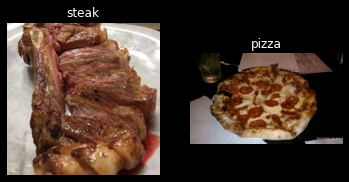

In [20]:
# Visualize the data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image('pizza_steak/train/', 'steak')
plt.subplot(1, 2, 2)
pizza_img = view_random_image('pizza_steak/train/', 'pizza')

### 2. Preprocess the data (prepare it for a model)

In [21]:
# Define directory dataset paths 
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

Our next step is to turn our data into **batches**.

A batch is a small subset of data. Rather than look at all -10000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons: 
1. 10,000 images (or more) might not fit into the memory of your processor (GPU).
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

Why 32?

Because 32 is good for your health...

In [22]:
# Create train and test data generate and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [23]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # Target directory
                                               target_size=(224, 224), # Target size of images (height, width)
                                               class_mode='binary', # Type of data you're working with 
                                               batch_size=32) # Size of minibatches to load data into

test_data = train_datagen.flow_from_directory(directory=test_dir, # Target directory
                                              target_size=(224, 224), # Target size of images (height, width)
                                              class_mode='binary', # Type of data you're working with
                                              batch_size=32) # Size of minibatches to load data into

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [24]:
# Get a sample of a train data batch
images, labels = train_data.next() # Get the 'next' batch  of images/labelsin train_data
len(images), len(labels)

(32, 32)

In [25]:
# How many batches are there?
len(train_data)

47

In [26]:
# Get the first two images
images[0].shape, images[0]

((224, 224, 3),
 array([[[0.47058827, 0.40784317, 0.34509805],
         [0.48627454, 0.42352945, 0.36078432],
         [0.48627454, 0.43529415, 0.37254903],
         ...,
         [0.82745105, 0.7137255 , 0.48627454],
         [0.8431373 , 0.7372549 , 0.5294118 ],
         [0.87843144, 0.77647066, 0.58431375]],
 
        [[0.50980395, 0.427451  , 0.36078432],
         [0.5058824 , 0.42352945, 0.35686275],
         [0.5137255 , 0.4431373 , 0.3647059 ],
         ...,
         [0.82745105, 0.7058824 , 0.48235297],
         [0.82745105, 0.70980394, 0.49803925],
         [0.8431373 , 0.73333335, 0.5372549 ]],
 
        [[0.5254902 , 0.427451  , 0.34901962],
         [0.5372549 , 0.43921572, 0.36078432],
         [0.5372549 , 0.45098042, 0.36078432],
         ...,
         [0.82745105, 0.7019608 , 0.4784314 ],
         [0.82745105, 0.7058824 , 0.4901961 ],
         [0.8352942 , 0.7176471 , 0.5137255 ]],
 
        ...,
 
        [[0.77647066, 0.5647059 , 0.2901961 ],
         [0.77647066, 0.5

In [27]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN model (start with baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiments and then as you keep experimenting, you try to beat the baseline.

> **Note :** In deep learning almost an Infinite amount of architectures you could create. So, one of best ways to get started is to start with something simple and see if it works on your data and then introduced compatibility as required (e.g. look at which current model is performing best in a field for your problem).

In [28]:
# Make the creating of our model a little easier 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential
from tensorflow.keras.losses import BinaryCrossentropy

In [29]:
# Create the model (this will be our baseline, a layer convolutional neural network)
model_4 = Sequential([
    Conv2D(filters=10, # Filter is the number of sliding windows going across an input (higher = more complex model)
           kernel_size=3, # the size of the sliding window going across an input 
           strides=1, # the slize of step the sliding window takes across an input
           padding='valid', # If "same", output shape is same sa input shape, if "valid" output shape compressed
           activation='relu', 
           input_shape=(224, 224, 3)), # Input layer (specified input shape)
    Conv2D(filters=10, kernel_size=3, activation='relu'), 
    Conv2D(filters=10, kernel_size=3, activation='relu'),
    Flatten(),
    Dense(units=1, activation='sigmoid'), # Output layer (working with binary classification so only 1 output neruron)
])

In [30]:
# Compile the model
model_4.compile(loss=BinaryCrossentropy(),
                optimizer=Adam(), 
                metrics=['accuracy'])

In [31]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_3 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model

In [32]:
# Check the leangth of training and testing data generators
len(train_data), len(test_data)

(47, 16)

In [33]:
# Fit the model
history_4 = model_4.fit(train_data, # This is combination labels and sample
                        epochs=5, 
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 430ms/step - loss: 1.5457 - accuracy: 0.6393 - val_loss: 0.4444 - val_accuracy: 0.8040
Epoch 2/5
47/47 [==============================] - 19s 395ms/step - loss: 0.4413 - accuracy: 0.8127 - val_loss: 0.4224 - val_accuracy: 0.7920
Epoch 3/5
47/47 [==============================] - 19s 395ms/step - loss: 0.3297 - accuracy: 0.8660 - val_loss: 0.3643 - val_accuracy: 0.8360
Epoch 4/5
47/47 [==============================] - 19s 395ms/step - loss: 0.2034 - accuracy: 0.9367 - val_loss: 0.4032 - val_accuracy: 0.8220
Epoch 5/5
47/47 [==============================] - 19s 395ms/step - loss: 0.0840 - accuracy: 0.9833 - val_loss: 0.4866 - val_accuracy: 0.8100


### 5. Evaluating our model

It looks like our model is leaning something, let's evaluate it.

<AxesSubplot:>

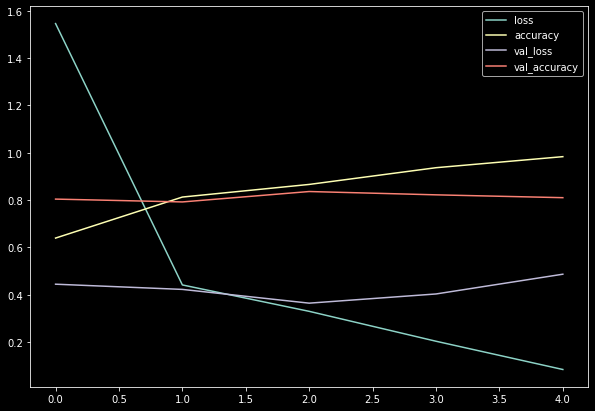

In [34]:
import pandas as pd

# Let's plot the training curves
pd.DataFrame(history_4.history).plot(figsize=(10, 7))

In [121]:
# Plot the validation and training curves seprately
def plot_loss_curves(history_):
    '''
    Returns separate loss curves for training and validation metrics.
    '''
    loss = history_.history['loss']
    val_loss = history_.history['val_loss']
    
    accuracy = history_.history['accuracy']
    val_accuracy = history_.history['val_accuracy']
    
    epochs = range(len(history_.history['loss'])) # How many epochs did we run for?
    
    plt.figure(figsize=(12, 5))
    
    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='Training_loss')
    plt.plot(epochs, val_loss, label='Val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()
    
    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='Accuracy')
    plt.plot(epochs, val_accuracy, label='Val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()

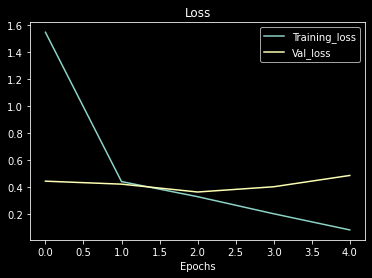

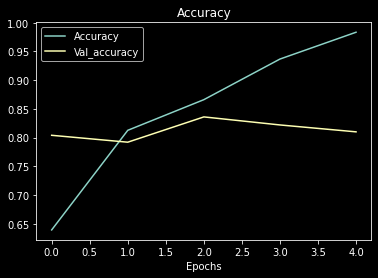

In [36]:
# Check out the loss and accuracy of model_4
plot_loss_curves(history_4)

> **Note :** When the model's **validation loss starts to increase**, it's likely that the model is **over-fitting** the training dataset. This means, it's learning the patterns in the training dataset *too well* and the model ability to generalize to unseen data will be diminished.

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:
1. Create a baseline
2. Beat the baseline by over-fitting a larger model
3. Reduce over-fitting

Way to induce over-fitting
* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to output of our flattened layer

Reduce Over-fitting
* Add data augmentation 
* Add regularization layers (such as MaxPool2D)
* Add more data...

> **Note :** Reducing over-fitting is also known as *regularization*.

In [37]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
    Conv2D(filters=10, kernel_size=3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [38]:
# Compile the model
model_5.compile(loss=BinaryCrossentropy(),
                optimizer=Adam(),
                metrics=['accuracy'])

In [39]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 186ms/step - loss: 0.6211 - accuracy: 0.6260 - val_loss: 0.4722 - val_accuracy: 0.7740
Epoch 2/5
47/47 [==============================] - 8s 169ms/step - loss: 0.4554 - accuracy: 0.7927 - val_loss: 0.4211 - val_accuracy: 0.8160
Epoch 3/5
47/47 [==============================] - 8s 169ms/step - loss: 0.4175 - accuracy: 0.8167 - val_loss: 0.3686 - val_accuracy: 0.8380
Epoch 4/5
47/47 [==============================] - 8s 169ms/step - loss: 0.3853 - accuracy: 0.8360 - val_loss: 0.3494 - val_accuracy: 0.8520
Epoch 5/5
47/47 [==============================] - 8s 168ms/step - loss: 0.3592 - accuracy: 0.8480 - val_loss: 0.3533 - val_accuracy: 0.8240


In [40]:
# Get the summary
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6760)             

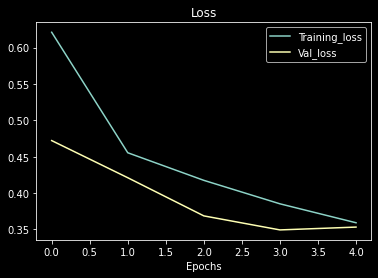

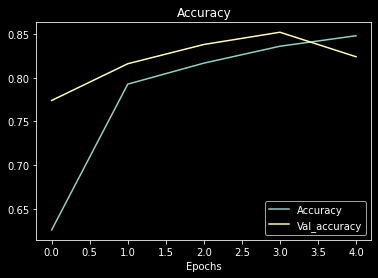

In [41]:
# Plot loss curve
plot_loss_curves(history_5)

#### Opening our bag of tricks and finding data augmentation

In [42]:
# Create ImageDataGenerator training instance with data augmentation 
train_datagen_augmentation = ImageDataGenerator(rescale=1/255.,
                                                rotation_range=0.2, # How much do you want to rotate an image?
                                                shear_range=0.2, # how much do you want to share an image?
                                                zoom_range=0.2, # zoom in randomly to an image?
                                                width_shift_range=0.2, # move your image around on the x-axis
                                                height_shift_range=0.2, # move your image around on the y-axis
                                                horizontal_flip=True) # do you want to flip an image?

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset\
test_dataset = ImageDataGenerator(rescale=1/255.)

> **Question :** What is data augmentation?

Data augmentation is the process of altering our training data, leading it to more diversity and in turn allowing our models to learn more generalization (hopefully) patterns. Altering might mean adjusting the rotation of an image, filling it, cropping it or something similar.

Let's write some code to visualize data augmentation...

In [43]:
# Import dataa and augment it from training directory
print('Augmented Train data')
train_data_augmented = train_datagen_augmentation.flow_from_directory(train_dir,
                                                                      target_size=(224, 224),
                                                                      batch_size=32,
                                                                      class_mode='binary',
                                                                      shuffle=False) # For demonstration purpose only

# Create Non-augmented train data batches 
print('Non-Augmented Train data')
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224), 
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)

# Create Non-augmented test data batches
print('Non-augmented Test data')
test_data = test_dataset.flow_from_directory(test_dir, 
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')


Augmented Train data
Found 1500 images belonging to 2 classes.
Non-Augmented Train data
Found 1500 images belonging to 2 classes.
Non-augmented Test data
Found 500 images belonging to 2 classes.


> **Note :** Data augmentation is usually only performed on the training data. Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.

Finally... let's visualize some augmented data !!!

In [44]:
# Get some sample data batches 
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # note: labels aren't augmented... only

showing iamge number: 20


(-0.5, 223.5, 223.5, -0.5)

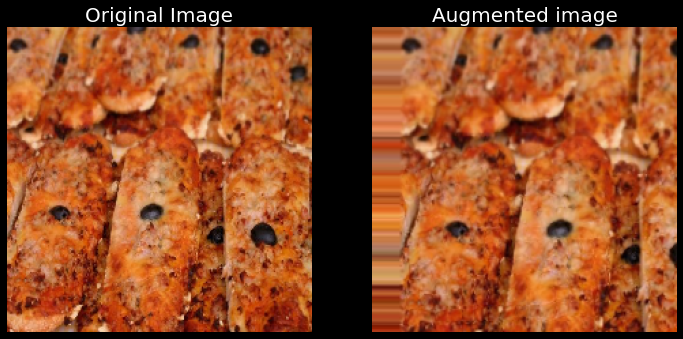

In [45]:
# Show original image and augmented image
import random
random_number = random.randint(0, 31) # our batch size 32...
print(f'showing iamge number: {random_number}')
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(images[random_number], )
plt.title('Original Image', size=20)
plt.axis(False)
plt.subplot(1, 2, 2)
plt.imshow(augmented_images[random_number])
plt.title('Augmented image', size=20)
plt.axis(False)

Now we've seen what augmented training data looks like, let's build a model and see how it learns on augmented data.

In [46]:
# Create a model (same as model_5)
model_6 = Sequential([
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss=BinaryCrossentropy(),
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented, #fitting model_6 on augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 496ms/step - loss: 0.7504 - accuracy: 0.4653 - val_loss: 0.6917 - val_accuracy: 0.5040
Epoch 2/5
47/47 [==============================] - 23s 494ms/step - loss: 0.6943 - accuracy: 0.4707 - val_loss: 0.6860 - val_accuracy: 0.5720
Epoch 3/5
47/47 [==============================] - 23s 493ms/step - loss: 0.6924 - accuracy: 0.5187 - val_loss: 0.6750 - val_accuracy: 0.7580
Epoch 4/5
47/47 [==============================] - 23s 492ms/step - loss: 0.6903 - accuracy: 0.6540 - val_loss: 0.6652 - val_accuracy: 0.7660
Epoch 5/5
47/47 [==============================] - 23s 496ms/step - loss: 0.6571 - accuracy: 0.6987 - val_loss: 0.5445 - val_accuracy: 0.7420


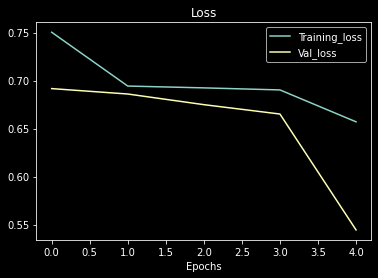

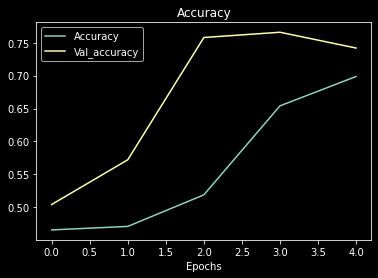

In [47]:
# Check our model training curves
plot_loss_curves(history_6)

Let's shuffle our training data and augmented training data after train another model (the same as before) on it see what happens...!!

In [48]:
# Import data and augmented it shuffle it from training directory
train_data_augmented_shuffled = train_datagen_augmentation.flow_from_directory(train_dir,
                                                                               target_size=(224, 224),
                                                                               batch_size=32,
                                                                               class_mode='binary',
                                                                               shuffle=True)

# Create a model (same as befor model_6, but this time data shuffled)
model_7 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss=BinaryCrossentropy(),
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Found 1500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 24s 499ms/step - loss: 0.6479 - accuracy: 0.6053 - val_loss: 0.5472 - val_accuracy: 0.7660
Epoch 2/5
47/47 [==============================] - 23s 498ms/step - loss: 0.5545 - accuracy: 0.7227 - val_loss: 0.4045 - val_accuracy: 0.8280
Epoch 3/5
47/47 [==============================] - 23s 494ms/step - loss: 0.4990 - accuracy: 0.7607 - val_loss: 0.3883 - val_accuracy: 0.8180
Epoch 4/5
47/47 [==============================] - 24s 508ms/step - loss: 0.4834 - accuracy: 0.7747 - val_loss: 0.3466 - val_accuracy: 0.8600
Epoch 5/5
47/47 [==============================] - 23s 496ms/step - loss: 0.4739 - accuracy: 0.7813 - val_loss: 0.3368 - val_accuracy: 0.8580


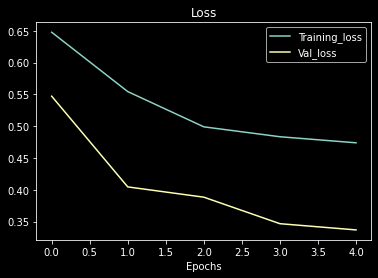

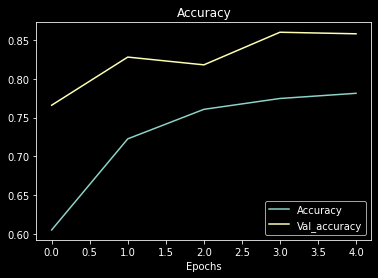

In [49]:
plot_loss_curves(history_7)

> **Note :** When shuffling data, the model gets exposed to all different kinds of data during training, thus enabling it to lean features across a wide array of images (in our case, pizza & steak at the same time instead of just pizza then steak).

### 7. Repeat until satisfied 

Common ways to improve a deep model:
1. Adding layers ✔
2. Increase the number of hidden units ✔
3. Change the activation functions ✔
4. Change the optimization function ✔
5. Change the learning rate ✔
6. Fitting on more data ✔
7. Fitting for longer (*Let's try this*)

Since we've already beaten our baseline, there are a few things we could try to improve our model:
* Increase the number of model layers(e.g. add more `Conv2D`/`MaxPool2D` layers)
* Increase the number of filters in each *Convolution* layer(e.g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find the ideal learning rate
* Get the more data (give the model more opportunities to learn)
* Use *transfer learning* to leverage what another image model has learn and adjust for our own case.

In [50]:
# Create the model (same as model_1 reference from CNN explainer)

# set the random seed
tf.random.set_seed(42)

# get all pixel value beween 0 to 1
train_datagen_aug = ImageDataGenerator(rescale=1/255.,
                                   rotation_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1/255.)

# import data into directory and turn into batches
train_data = train_datagen_aug.flow_from_directory(train_dir, 
                                                   target_size=(224, 224),
                                                   batch_size=32,
                                                   class_mode='binary',
                                                   shuffle=True)
test_data = test_datagen.flow_from_directory(test_dir, 
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

# Create the model
model_8 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(2),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_8.compile(loss=BinaryCrossentropy(),
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_8 = model_8.fit(train_data, epochs=10, 
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/10
47/47 [==============================] - 26s 528ms/step - loss: 0.6556 - accuracy: 0.6033 - val_loss: 0.5036 - val_accuracy: 0.8100
Epoch 2/10
47/47 [==============================] - 26s 557ms/step - loss: 0.5146 - accuracy: 0.7547 - val_loss: 0.3880 - val_accuracy: 0.8380
Epoch 3/10
47/47 [==============================] - 27s 577ms/step - loss: 0.4730 - accuracy: 0.7847 - val_loss: 0.3445 - val_accuracy: 0.8460
Epoch 4/10
47/47 [==============================] - 27s 570ms/step - loss: 0.4304 - accuracy: 0.8040 - val_loss: 0.3136 - val_accuracy: 0.8660
Epoch 5/10
47/47 [==============================] - 26s 555ms/step - loss: 0.4441 - accuracy: 0.8033 - val_loss: 0.3213 - val_accuracy: 0.8800
Epoch 6/10
47/47 [==============================] - 25s 525ms/step - loss: 0.4415 - accuracy: 0.7920 - val_loss: 0.3042 - val_accuracy: 0.8740
Epoch 7/10
47/47 [==============================] - 27s 561

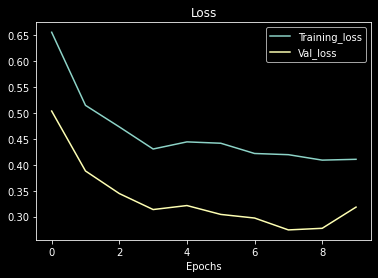

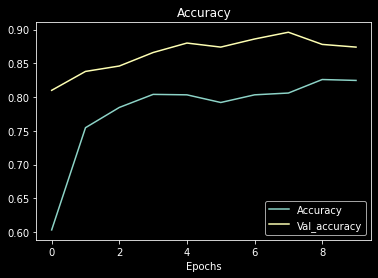

In [51]:
# plot loss curve
plot_loss_curves(history_8)

In [52]:
# check evalution of model_8
model_8.evaluate(test_data)

16/16 [==============================] - 2s 101ms/step - loss: 0.3183 - accuracy: 0.8740


[0.31834354996681213, 0.8740000128746033]

In [53]:
# Create sam emodel for me

# Set the random seed
tf.random.set_seed(42)

# Turn all pixels value between 0 to 1
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Import data into directory and turn into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               seed=42)
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary',
                                             seed=42)

# Create the model (this time filter=32, and kernal_size=2)
model_9 = Sequential([
    Conv2D(32, 2, activation='relu', input_shape=(224, 224, 3)),
    Conv2D(32, 2, activation='relu'),
    MaxPool2D(2),
    Conv2D(32, 2, activation='relu'),
    Conv2D(32, 2, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_9.compile(loss=BinaryCrossentropy(),
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 47s 921ms/step - loss: 0.6304 - accuracy: 0.6353 - val_loss: 0.4409 - val_accuracy: 0.7940
Epoch 2/5
47/47 [==============================] - 38s 817ms/step - loss: 0.4306 - accuracy: 0.8033 - val_loss: 0.3450 - val_accuracy: 0.8540
Epoch 3/5
47/47 [==============================] - 38s 817ms/step - loss: 0.3812 - accuracy: 0.8320 - val_loss: 0.3327 - val_accuracy: 0.8660
Epoch 4/5
47/47 [==============================] - 41s 867ms/step - loss: 0.3329 - accuracy: 0.8687 - val_loss: 0.3889 - val_accuracy: 0.8320
Epoch 5/5
47/47 [==============================] - 38s 803ms/step - loss: 0.3294 - accuracy: 0.8520 - val_loss: 0.3629 - val_accuracy: 0.8480


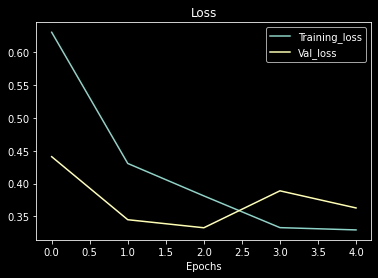

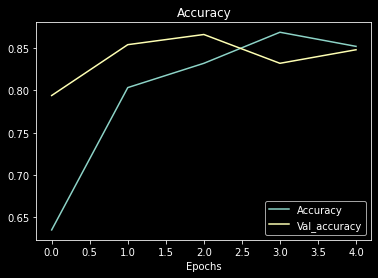

In [54]:
plot_loss_curves(history_9)

In [56]:
tf.round(model_9.predict(test_data))

<tf.Tensor: shape=(500, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
 

## Making a prediction with our trained model on our own custom data

In [57]:
# Classes we're working with 
print(class_names)

['pizza' 'steak']


In [58]:
# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread('03-steak.jpeg')

--2021-06-12 09:52:54--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: '03-steak.jpeg'

     0K .......... .......... .......... .......... ..........  2%  140K 13s
    50K .......... .......... .......... .......... ..........  5% 4.10M 7s
   100K .......... .......... .......... .......... ..........  7% 58.7M 4s
   150K .......... .......... .......... .......... .......... 10% 8.73M 3s
   200K .......... .......... .......... .......... .......... 12% 4.79M 3s
   250K .......... .......... .......... .......... .......... 15% 16.9M 2s
   300K .......... .......... .......... .......... .......... 18% 2.83M 2s
   350K ...

(-0.5, 3023.5, 4031.5, -0.5)

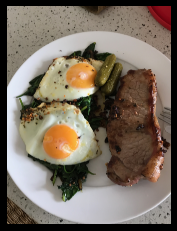

In [61]:
plt.imshow(steak)
plt.axis(False)

In [62]:
# Check the shape of our image 
steak.shape

(4032, 3024, 3)

> **Note :** When you a train a neural network and you want to make prediction with it on your own custom data, it's important than your custom data (or new data) is preprocessed into the same formate as the data your model was trained on.

In [69]:
# Create a function to import an image and resize it to be able to use with our model
def load_and_prep_image(filename, img_shape=224):
    '''
    Reads an image from filename, turns it into a tensor and reshapes 
    it to (img_shape, img_shape, color_channels).
    '''
    # Read in the image
    img = tf.io.read_file(filename)
    # Decode the read file into a tensor
    img = tf.image.decode_image(img)
    # Resize the image
    img = tf.image.resize(img, size=[img_shape, img_shape])
    # Rescale the image (get the all values between 0 and 1)
    img = img/255.
    return img

In [72]:
# Load in and preprocess our custom image
steak = load_and_prep_image('03-steak.jpeg')
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [80]:
pred_7 = model_7.predict(tf.expand_dims(steak, axis=0))
pred_7

array([[0.8905178]], dtype=float32)

> *Looks like our custom image is being put through our model, however, it currently outputs a prediction probability, wouldn't it be could visualize the image as well as the model's prediction ?*

In [79]:
# Remind ourselves of our class names 
class_names

array(['pizza', 'steak'], dtype='<U9')

In [81]:
# We can index the predicted class by rounding the prediction 
# probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred_7))]
pred_class

'steak'

In [86]:
def pred_and_plot(model, filename, class_names=class_names, img_shape=224):
    '''
    Import an image located at filename, makes a prediction with model 
    and plots the image with the predicted class as the title. 
    '''
    # Import the taret image and preprocess it 
    
    # Read in the image
    img = tf.io.read_file(filename)
    # Decode the read file in tensor
    img = tf.image.decode_image(img)
    # Resize the image
    img = tf.image.resize(img, size=[img_shape, img_shape])
    # Rescale the image
    img = img/255.
    
    # Make a prediction 
    pred = model.predict(tf.expand_dims(img, axis=0))
    
    # Get the predicted class
    pred_class = class_names[int(tf.round(pred))]
    
    # Plot the image and predicted class
    plt.imshow(img)
    plt.title(f'Prediction: {pred_class}')
    plt.axis(False)

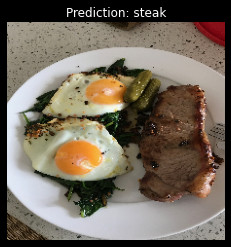

In [87]:
# Test our model on a custom image
pred_and_plot(model_7, '03-steak.jpeg')

Our model works Let's try it on another image... this time pizza

--2021-06-12 10:57:04--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: '03-pizza-dad.jpeg'

     0K .......... .......... .......... .......... ..........  1%  820K 3s
    50K .......... .......... .......... .......... ..........  3% 31.4M 2s
   100K .......... .......... .......... .......... ..........  5% 44.6M 1s
   150K .......... .......... .......... .......... ..........  7% 2.75M 1s
   200K .......... .......... .......... .......... ..........  8% 7.98M 1s
   250K .......... .......... .......... .......... .......... 10% 4.40M 1s
   300K .......... .......... .......... .......... .......... 12% 3.25M 1s
   3

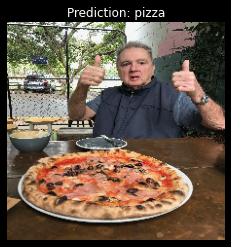

In [88]:
# Downlaod another test custom image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7, '03-pizza-dad.jpeg')

# Multi-class Image Classification 

We've just been through a bunch of the following steps with a binary classification problem (pizza vs. steak), now we're going to step things up a notch with 10 classes of food (multi-class classification).

1. Become one with the data
2. Pre-process the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (Over-fit it to make sure it works)
5. Evaluate the model 
6. Adjust different hyper-parameters and improve the model (try to beat baseline/reduce over-fitting)
7. Repeat until satisfied

## 1. Import and become one with the data 

In [89]:
import zipfile

# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# # Unzip our data
# zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip', 'r')
# zip_ref.extractall()
# zip_ref.close()

--2021-06-12 11:13:55--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.77.48, 142.250.77.80, 142.250.182.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.77.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: '10_food_classes_all_data.zip'

     0K .......... .......... .......... .......... ..........  0%  150K 56m9s
    50K .......... .......... .......... .......... ..........  0% 43.2M 28m10s
   100K .......... .......... .......... .......... ..........  0% 42.7M 18m51s
   150K .......... .......... .......... .......... ..........  0% 1.12M 15m58s
   200K .......... .......... .......... .......... ..........  0% 7.58M 12m59s
   250K .......... .......... .......... .......... ..........  0% 20.7M 10m54s
   300K .......... .......... .......... .......... ..........  0% 2.8

 10400K .......... .......... .......... .......... ..........  2% 16.9M 2m5s
 10450K .......... .......... .......... .......... ..........  2% 6.73M 2m5s
 10500K .......... .......... .......... .......... ..........  2% 8.16M 2m4s
 10550K .......... .......... .......... .......... ..........  2%  275K 2m12s
 10600K .......... .......... .......... .......... ..........  2% 9.89M 2m12s
 10650K .......... .......... .......... .......... ..........  2%  159M 2m11s
 10700K .......... .......... .......... .......... ..........  2% 1.02M 2m13s
 10750K .......... .......... .......... .......... ..........  2% 3.83M 2m13s
 10800K .......... .......... .......... .......... ..........  2% 15.8M 2m12s
 10850K .......... .......... .......... .......... ..........  2% 8.30M 2m12s
 10900K .......... .......... .......... .......... ..........  2% 7.05M 2m12s
 10950K .......... .......... .......... .......... ..........  2% 11.0M 2m11s
 11000K .......... .......... .......... .......... ...

 90200K .......... .......... .......... .......... .......... 17% 6.77M 88s
 90250K .......... .......... .......... .......... .......... 17% 1.79M 88s
 90300K .......... .......... .......... .......... .......... 17% 7.16M 88s
 90350K .......... .......... .......... .......... .......... 17% 4.80M 88s
 90400K .......... .......... .......... .......... .......... 17% 10.4M 88s
 90450K .......... .......... .......... .......... .......... 17% 10.5M 88s
 90500K .......... .......... .......... .......... .......... 17% 16.6M 88s
 90550K .......... .......... .......... .......... .......... 17% 10.1M 88s
 90600K .......... .......... .......... .......... .......... 17% 2.55M 88s
 90650K .......... .......... .......... .......... .......... 17% 18.1M 88s
 90700K .......... .......... .......... .......... .......... 17% 10.4M 88s
 90750K .......... .......... .......... .......... .......... 17% 7.38M 88s
 90800K .......... .......... .......... .......... .......... 17% 4.42M 88s

144600K .......... .......... .......... .......... .......... 28%  198M 76s
144650K .......... .......... .......... .......... .......... 28%  153M 75s
144700K .......... .......... .......... .......... .......... 28% 2.75M 75s
144750K .......... .......... .......... .......... .......... 28% 1.82M 76s
144800K .......... .......... .......... .......... .......... 28% 5.45M 75s
144850K .......... .......... .......... .......... .......... 28% 2.45M 76s
144900K .......... .......... .......... .......... .......... 28% 6.80M 75s
144950K .......... .......... .......... .......... .......... 28% 78.8M 75s
145000K .......... .......... .......... .......... .......... 28%  169M 75s
145050K .......... .......... .......... .......... .......... 28% 31.9M 75s
145100K .......... .......... .......... .......... .......... 28% 2.39M 75s
145150K .......... .......... .......... .......... .......... 28% 4.83M 75s
145200K .......... .......... .......... .......... .......... 28% 7.01M 75s

199550K .......... .......... .......... .......... .......... 39% 3.72M 64s
199600K .......... .......... .......... .......... .......... 39% 4.62M 64s
199650K .......... .......... .......... .......... .......... 39% 4.87M 64s
199700K .......... .......... .......... .......... .......... 39% 4.19M 64s
199750K .......... .......... .......... .......... .......... 39% 4.40M 64s
199800K .......... .......... .......... .......... .......... 39% 4.08M 64s
199850K .......... .......... .......... .......... .......... 39%  928K 64s
199900K .......... .......... .......... .......... .......... 39% 1.05M 64s
199950K .......... .......... .......... .......... .......... 39% 7.09M 64s
200000K .......... .......... .......... .......... .......... 39% 7.84M 64s
200050K .......... .......... .......... .......... .......... 39% 10.1M 64s
200100K .......... .......... .......... .......... .......... 39% 3.88M 64s
200150K .......... .......... .......... .......... .......... 39% 12.2M 64s

267700K .......... .......... .......... .......... .......... 52%  165M 50s
267750K .......... .......... .......... .......... .......... 52%  269M 50s
267800K .......... .......... .......... .......... .......... 52%  292M 50s
267850K .......... .......... .......... .......... .......... 52%  450M 50s
267900K .......... .......... .......... .......... .......... 52%  469M 49s
267950K .......... .......... .......... .......... .......... 52% 3.02M 49s
268000K .......... .......... .......... .......... .......... 52%  388M 49s
268050K .......... .......... .......... .......... .......... 52%  456M 49s
268100K .......... .......... .......... .......... .......... 52% 13.4M 49s
268150K .......... .......... .......... .......... .......... 52% 8.37M 49s
268200K .......... .......... .......... .......... .......... 52% 3.22M 49s
268250K .......... .......... .......... .......... .......... 52% 95.1M 49s
268300K .......... .......... .......... .......... .......... 52%  234M 49s

362350K .......... .......... .......... .......... .......... 71% 3.35M 30s
362400K .......... .......... .......... .......... .......... 71% 8.14M 30s
362450K .......... .......... .......... .......... .......... 71% 10.9M 30s
362500K .......... .......... .......... .......... .......... 71% 16.2M 30s
362550K .......... .......... .......... .......... .......... 71% 14.3M 30s
362600K .......... .......... .......... .......... .......... 71% 3.67M 30s
362650K .......... .......... .......... .......... .......... 71% 3.42M 30s
362700K .......... .......... .......... .......... .......... 71% 12.7M 30s
362750K .......... .......... .......... .......... .......... 71% 5.97M 30s
362800K .......... .......... .......... .......... .......... 71%  121M 30s
362850K .......... .......... .......... .......... .......... 71% 13.1M 30s
362900K .......... .......... .......... .......... .......... 71% 17.5M 30s
362950K .......... .......... .......... .......... .......... 71% 11.0M 30s

438800K .......... .......... .......... .......... .......... 86% 7.37M 14s
438850K .......... .......... .......... .......... .......... 86%  210M 14s
438900K .......... .......... .......... .......... .......... 86% 12.9M 14s
438950K .......... .......... .......... .......... .......... 86%  136M 14s
439000K .......... .......... .......... .......... .......... 86%  223M 14s
439050K .......... .......... .......... .......... .......... 86%  302M 14s
439100K .......... .......... .......... .......... .......... 86% 10.7M 14s
439150K .......... .......... .......... .......... .......... 86% 3.90M 14s
439200K .......... .......... .......... .......... .......... 86%  826K 14s
439250K .......... .......... .......... .......... .......... 86%  322M 14s
439300K .......... .......... .......... .......... .......... 86%  202M 14s
439350K .......... .......... .......... .......... .......... 86% 4.18M 14s
439400K .......... .......... .......... .......... .......... 86%  255M 14s

In [90]:
import os

# Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk('10_food_classes_all_data'):
    print(f'There are {len(dirnames)} directories and {len(filenames)} images in "{dirpath}".')

There are 2 directories and 0 images in "10_food_classes_all_data".
There are 10 directories and 0 images in "10_food_classes_all_data\test".
There are 0 directories and 250 images in "10_food_classes_all_data\test\chicken_curry".
There are 0 directories and 250 images in "10_food_classes_all_data\test\chicken_wings".
There are 0 directories and 250 images in "10_food_classes_all_data\test\fried_rice".
There are 0 directories and 250 images in "10_food_classes_all_data\test\grilled_salmon".
There are 0 directories and 250 images in "10_food_classes_all_data\test\hamburger".
There are 0 directories and 250 images in "10_food_classes_all_data\test\ice_cream".
There are 0 directories and 250 images in "10_food_classes_all_data\test\pizza".
There are 0 directories and 250 images in "10_food_classes_all_data\test\ramen".
There are 0 directories and 250 images in "10_food_classes_all_data\test\steak".
There are 0 directories and 250 images in "10_food_classes_all_data\test\sushi".
There are 

In [94]:
!dir 10_food_classes_all_data

 Volume in drive D is Adobe
 Volume Serial Number is 72F5-1F24

 Directory of d:\Python\TensorFlow_full_course\10_food_classes_all_data

12-06-2021  11:15 AM    <DIR>          .
12-06-2021  11:15 AM    <DIR>          ..
12-06-2021  11:15 AM    <DIR>          test
12-06-2021  11:15 AM    <DIR>          train
               0 File(s)              0 bytes
               4 Dir(s)  39,788,515,328 bytes free


In [95]:
# Setup the train and test directories...
train_dir = '10_food_classes_all_data/train/'
test_dir = '10_food_classes_all_data/test/'

In [103]:
# Let's the get class name 
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

['1618489.jpg']
Image Shape: (512, 512, 3)


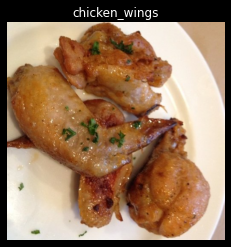

In [109]:
# Visualize , visualize, visualize
import random
img = view_random_image(target_dir=train_dir, target_class=random.choice(class_names))

## 2. Preprocess the data (prepare it for a model)

In [110]:
# Create train and test data genarate and rescale the data
# (convert all values in 0 and 1, it's also called as normalize data)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [115]:
# Load in our images from directories and turn them into batches
train_data = train_datagen.flow_from_directory(train_dir, 
                                               target_size=(224, 224),
                                               class_mode='sparse',
                                               batch_size=32, 
                                               seed=42)
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             class_mode='sparse',
                                             batch_size=32,
                                             seed=42)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## 3. Create and Compile the model

In [118]:
# Build the CNN model 
model_10 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

# compile the model
model_10.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

## 4. Fit the model

In [119]:
# Fith the model 
history_10 = model_10.fit(train_data,
                          epochs=5, 
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 79s 333ms/step - loss: 2.1531 - accuracy: 0.2133 - val_loss: 1.9944 - val_accuracy: 0.3096
Epoch 2/5
235/235 [==============================] - 77s 329ms/step - loss: 1.8746 - accuracy: 0.3479 - val_loss: 1.9145 - val_accuracy: 0.3356
Epoch 3/5
235/235 [==============================] - 77s 327ms/step - loss: 1.5682 - accuracy: 0.4665 - val_loss: 1.9216 - val_accuracy: 0.3336
Epoch 4/5
235/235 [==============================] - 77s 327ms/step - loss: 1.0391 - accuracy: 0.6615 - val_loss: 2.2675 - val_accuracy: 0.3068
Epoch 5/5
235/235 [==============================] - 77s 327ms/step - loss: 0.5020 - accuracy: 0.8447 - val_loss: 2.9413 - val_accuracy: 0.2820


Epoch 1/5
235/235 [==============================] - 246s 1s/step - loss: 2.2026 - accuracy: 0.1891 - val_loss: 2.0674 - val_accuracy: 0.2440

Epoch 2/5
235/235 [==============================] - 62s 264ms/step - loss: 1.9608 - accuracy: 0.3155 - val_loss: 1.8969 - val_accuracy: 0.3384

Epoch 3/5
235/235 [==============================] - 62s 264ms/step - loss: 1.7072 - accuracy: 0.4223 - val_loss: 1.8950 - val_accuracy: 0.3408

Epoch 4/5
235/235 [==============================] - 65s 277ms/step - loss: 1.2004 - accuracy: 0.6135 - val_loss: 2.0944 - val_accuracy: 0.3212

Epoch 5/5
235/235 [==============================] - 62s 262ms/step - loss: 0.5937 - accuracy: 0.8200 - val_loss: 2.7525 - val_accuracy: 0.2936

## 5. Evaluate the model

In [123]:
# Evaluate on the test data
model_10.evaluate(test_data)

79/79 [==============================] - 9s 110ms/step - loss: 2.9413 - accuracy: 0.2820


[2.9413034915924072, 0.28200000524520874]

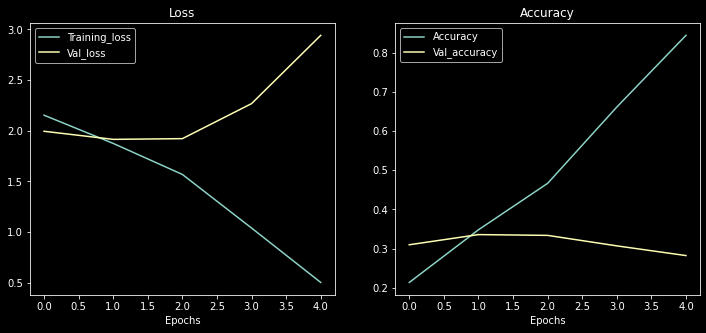

In [122]:
plot_loss_curves(history_10)

What do these loss curves tell us ?

well... it seems our model is **over-fitting** the training set quite badly... in other words, it's getting great results on the training data but fails to generalize well to unseen data and performs poorly on the test dataset.

## 6. Adjust the model hyper-parameters (to beat the baselines/reduce over-fitting)

Due to its performance on the training data, it's clear our model is learning somethings...

However, it's not generalizing well to unseen data (Over-fitting).

So, let's try and fix over-fitting by... 

* **Get more data :** Having more data gives a model more opportunity to learn diverse patterns....
* **Simply the model :** If our current model is over-fitting the data, it may be too complicated of a model, one way to simplify a model is to: reduce # of layers or reduce # hidden units in layers
* **Use data augmentation :** data augmentation manipulates the training data in such a way to add more diversity to it (without altering the original data)
* **Use transfer learning :** transfer learning leverage the patterns another model has learned on similar data to your own and allows you to use those patterns on your own dataset.

In [124]:
model_10.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 53, 53, 10)        0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 28090)           

In [125]:
# How about we try and simplify the model first?
# Let's try to remove 2 convolutional layers...
model_11 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

# Fit the model
history_11 = model_11.fit(train_data,
                          epochs=5, 
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 168s 714ms/step - loss: 2.3639 - accuracy: 0.2200 - val_loss: 2.0121 - val_accuracy: 0.2728
Epoch 2/5
235/235 [==============================] - 38s 163ms/step - loss: 1.8204 - accuracy: 0.3745 - val_loss: 1.9156 - val_accuracy: 0.3200
Epoch 3/5
235/235 [==============================] - 38s 163ms/step - loss: 1.5174 - accuracy: 0.4947 - val_loss: 1.9581 - val_accuracy: 0.3300
Epoch 4/5
235/235 [==============================] - 38s 164ms/step - loss: 1.1383 - accuracy: 0.6285 - val_loss: 2.1705 - val_accuracy: 0.3068
Epoch 5/5
235/235 [==============================] - 38s 162ms/step - loss: 0.7386 - accuracy: 0.7720 - val_loss: 2.4729 - val_accuracy: 0.3024


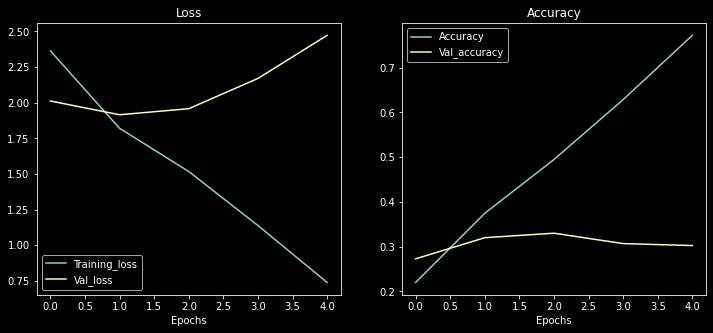

In [126]:
# Check out the loss curves of model_11
plot_loss_curves(history_11)

In [128]:
model_11.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 54, 54, 10)        0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 29160)             0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                291610    
Total params: 292,800
Trainable params: 292,800
Non-trainable params: 0
_______________________________________________

Looks like our "simplifying the model" experiment didn't work... the accuracy went down and over-fitting continued...

How about we try data augmentation..??

### Trying to reduced over-fitting with data augmentation

Let's try and improve our model's results by using augmented training data...

Ideally, we want to :
* Reduce over-fitting (get the train and validation loss curves closer)
* Improve validation accuracy

In [131]:
# Preprocess data
train_datagen = ImageDataGenerator(rescale=1/255.,
                                   rotation_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load our images into directories and turn into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               batch_size=32,
                                               seed=42)
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             class_mode='categorical',
                                             batch_size=32,
                                             seed=42)

# Create the model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

# compile the model
model_12.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

# Fit the model
history_12 = model_12.fit(train_data, 
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.
Epoch 1/5
235/235 [==============================] - 253s 1s/step - loss: 2.2204 - accuracy: 0.1807 - val_loss: 2.0473 - val_accuracy: 0.2604
Epoch 2/5
235/235 [==============================] - 145s 616ms/step - loss: 2.0841 - accuracy: 0.2589 - val_loss: 1.9635 - val_accuracy: 0.3032
Epoch 3/5
235/235 [==============================] - 139s 588ms/step - loss: 2.0437 - accuracy: 0.2759 - val_loss: 1.9362 - val_accuracy: 0.3248
Epoch 4/5
235/235 [==============================] - 140s 593ms/step - loss: 2.0097 - accuracy: 0.2943 - val_loss: 1.9175 - val_accuracy: 0.3140
Epoch 5/5
235/235 [==============================] - 139s 589ms/step - loss: 1.9878 - accuracy: 0.3021 - val_loss: 1.8759 - val_accuracy: 0.3400


In [133]:
# Let's create another model but this time we'll fit it 
train_datagen = ImageDataGenerator(rescale=1/255.,
                                   rotation_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load our images into directories and turn into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               class_mode='sparse',
                                               batch_size=32,
                                               seed=42)
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             class_mode='sparse',
                                             batch_size=32,
                                             seed=42)

# on the augmented train data
model_13 = tf.keras.models.clone_model(model_10)

# Compile the cloned model (using the same setup as previous models)
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

# Fit the model
history_13 = model_13.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.
Epoch 1/5
235/235 [==============================] - 133s 561ms/step - loss: 2.2387 - accuracy: 0.1673 - val_loss: 2.1075 - val_accuracy: 0.2440
Epoch 2/5
235/235 [==============================] - 132s 560ms/step - loss: 2.1050 - accuracy: 0.2423 - val_loss: 1.9353 - val_accuracy: 0.3260
Epoch 3/5
235/235 [==============================] - 129s 550ms/step - loss: 2.0283 - accuracy: 0.2829 - val_loss: 1.8808 - val_accuracy: 0.3304
Epoch 4/5
235/235 [==============================] - 135s 572ms/step - loss: 1.9965 - accuracy: 0.2993 - val_loss: 1.8663 - val_accuracy: 0.3424
Epoch 5/5
235/235 [==============================] - 131s 556ms/step - loss: 1.9685 - accuracy: 0.3135 - val_loss: 1.7976 - val_accuracy: 0.3900


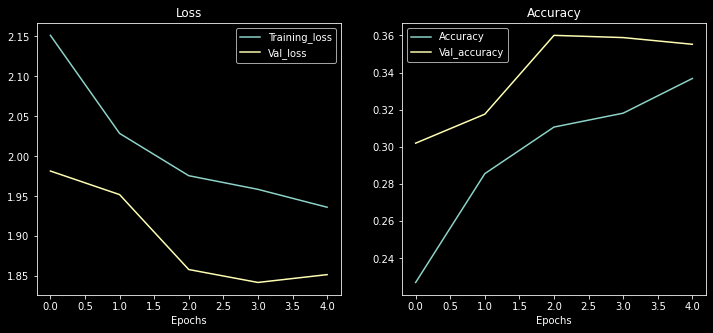

In [130]:
plot_loss_curves(history_12)

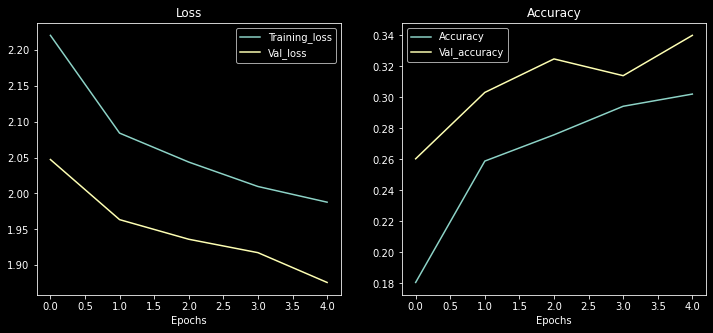

In [134]:
plot_loss_curves(history_12)

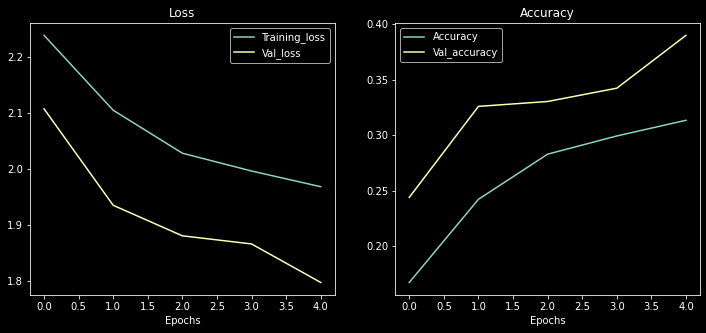

In [135]:
plot_loss_curves(history_13)

In [136]:
model_10.summary() == model_13.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 53, 53, 10)        0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 28090)           

True

> Woah! That looks much better, the loss curves are much closer to each other than the base line model and they look like they're heading in the right direction (certainly not wrong direction) so if we were to train for longer, we might see further improvements.

## 7. Repeat until satisfied 

We could keep going here... continually trying to bring our loss curves together and trying to improve the validation/test accuracy.

How?

By running lots of experiments, namely:
- restructuring our model's architecture (increasing layers/hidden units)
- adjust the learning rate 
- try different methods of data augmentation (adjust the hyper-parameters in our `ImageDataGenerator` instance)
- training for longer (e.g. 10 epochs instead of 5 epochs).
- try **transfer learning** 

### Making a prediction with our trained model 

Let's use our trained model to make some prediction on our own custom images!

In [138]:
# Remind ourselves of the classes our model is trained on
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [139]:
# Download some custom images
# !wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg

# !wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg


--2021-06-12 19:58:37--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3564285 (3.4M) [image/jpeg]
Saving to: '03-hamburger.jpeg'

     0K .......... .......... .......... .......... ..........  1%  119K 29s
    50K .......... .......... .......... .......... ..........  2% 18.6M 14s
   100K .......... .......... .......... .......... ..........  4% 1.18M 10s
   150K .......... .......... .......... .......... ..........  5% 1.55M 8s
   200K .......... .......... .......... .......... ..........  7% 1.41M 7s
   250K .......... .......... .......... .......... ..........  8% 3.30M 6s
   300K .......... .......... .......... .......... .......... 10% 1.92M 5s
 

In [150]:
# Reconfig pred_and_plot function to work with multi-class images
def pred_and_plot(model, filename, class_names=class_names, img_shape=224):
    '''
    Import an image located at filename, makes a prediction with model 
    and plots the image with the predicted class as the title. 
    '''
    # Import the taret image and preprocess it 
    
    # Read in the image
    img = tf.io.read_file(filename)
    # Decode the read file in tensor
    img = tf.image.decode_image(img)
    # Resize the image
    img = tf.image.resize(img, size=[img_shape, img_shape])
    # Rescale the image
    img = img/255.
    
    # Make a prediction 
    pred = model.predict(tf.expand_dims(img, axis=0))
    
    # Add in logic for multi-class & get pred_class name
    if len(pred[0]) > 1:
        pred_class = class_names[tf.argmax(pred[0])]
    else:
        pred_class = class_names[int(tf.round(pred[0]))]
    
    # Plot the image and predicted class
    plt.imshow(img)
    plt.title(f'Prediction: {pred_class}')
    plt.axis(False)

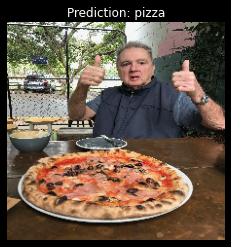

In [151]:
# Make a prediction using 
pred_and_plot(model=model_13, filename='03-pizza-dad.jpeg', class_names=list(class_names))

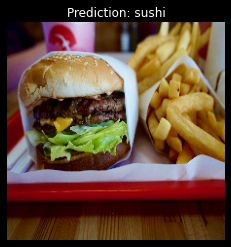

In [152]:
pred_and_plot(model=model_13, filename='03-hamburger.jpeg', class_names=list(class_names))

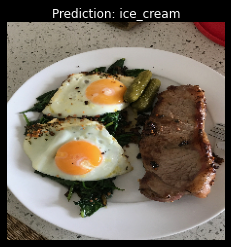

In [153]:
pred_and_plot(model=model_13, filename='03-steak.jpeg', class_names=list(class_names))

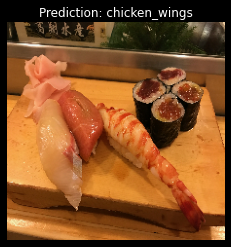

In [154]:
pred_and_plot(model=model_13, filename='03-sushi.jpeg', class_names=list(class_names))

Looks like our model didn't perform very well on our custom images but this because it only achieves -39% accuracy on the test data. So we can expect it to function quite poorly on other unseen data.

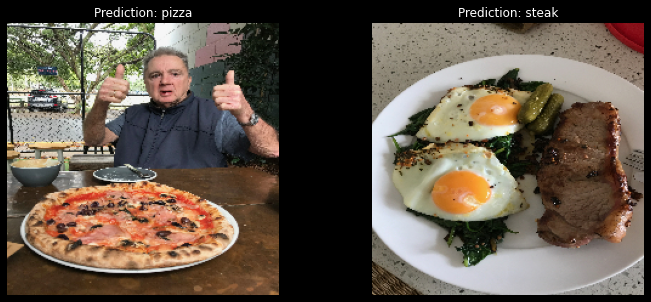

In [160]:
# Good news: our updated pred_and_plot function works for binary classification too...
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
pred_and_plot(model=model_7, filename='03-pizza-dad.jpeg', class_names=['pizza', 'steak'])
plt.subplot(1, 2, 2)
pred_and_plot(model=model_7, filename='03-steak.jpeg', class_names=['pizza', 'steak'])

## Saving and loading model 

In [161]:
# Save a model 
model_13.save('saved_trained_model_10')

INFO:tensorflow:Assets written to: saved_trained_model_10\assets


In [164]:
# Load in a trained model and evaluate it
loaded_model_13 = tf.keras.models.load_model('saved_trained_model_10')
loaded_model_13.evaluate(test_data)

79/79 [==============================] - 9s 108ms/step - loss: 1.7976 - accuracy: 0.3900


[1.7976086139678955, 0.38999998569488525]

In [165]:
# Compare our loaded model to our existing model 
model_13.evaluate(test_data)

79/79 [==============================] - 8s 105ms/step - loss: 1.7976 - accuracy: 0.3900


[1.7976086139678955, 0.38999998569488525]